In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_fscore_support

In [101]:
# Load dataset
data = pd.read_csv('/content/cervical_cancer.csv')
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [103]:
data_nan = data.replace('?', np.nan)

In [104]:
data_nan.isnull().sum() 

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [105]:
data = data_nan  

In [106]:
data = data._convert(numeric=True)

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [108]:
# for continuous variable
data['Number of sexual partners'] = data['Number of sexual partners'].fillna(data['Number of sexual partners'].median())
data['First sexual intercourse'] = data['First sexual intercourse'].fillna(data['First sexual intercourse'].median())
data['Num of pregnancies'] = data['Num of pregnancies'].fillna(data['Num of pregnancies'].median())
data['Smokes'] = data['Smokes'].fillna(1)
data['Smokes (years)'] = data['Smokes (years)'].fillna(data['Smokes (years)'].median())
data['Smokes (packs/year)'] = data['Smokes (packs/year)'].fillna(data['Smokes (packs/year)'].median())
data['Hormonal Contraceptives'] = data['Hormonal Contraceptives'].fillna(1)
data['Hormonal Contraceptives (years)'] = data['Hormonal Contraceptives (years)'].fillna(data['Hormonal Contraceptives (years)'].median())
data['IUD'] = data['IUD'].fillna(0) # Under suggestion
data['IUD (years)'] = data['IUD (years)'].fillna(0) #Under suggestion
data['STDs'] = data['STDs'].fillna(1)
data['STDs (number)'] = data['STDs (number)'].fillna(data['STDs (number)'].median())
data['STDs:condylomatosis'] = data['STDs:condylomatosis'].fillna(data['STDs:condylomatosis'].median())
data['STDs:cervical condylomatosis'] = data['STDs:cervical condylomatosis'].fillna(data['STDs:cervical condylomatosis'].median())
data['STDs:vaginal condylomatosis'] = data['STDs:vaginal condylomatosis'].fillna(data['STDs:vaginal condylomatosis'].median())
data['STDs:vulvo-perineal condylomatosis'] = data['STDs:vulvo-perineal condylomatosis'].fillna(data['STDs:vulvo-perineal condylomatosis'].median())
data['STDs:syphilis'] = data['STDs:syphilis'].fillna(data['STDs:syphilis'].median())
data['STDs:pelvic inflammatory disease'] = data['STDs:pelvic inflammatory disease'].fillna(data['STDs:pelvic inflammatory disease'].median())
data['STDs:genital herpes'] = data['STDs:genital herpes'].fillna(data['STDs:genital herpes'].median())
data['STDs:molluscum contagiosum'] = data['STDs:molluscum contagiosum'].fillna(data['STDs:molluscum contagiosum'].median())
data['STDs:AIDS'] = data['STDs:AIDS'].fillna(data['STDs:AIDS'].median())
data['STDs:HIV'] = data['STDs:HIV'].fillna(data['STDs:HIV'].median())
data['STDs:Hepatitis B'] = data['STDs:Hepatitis B'].fillna(data['STDs:Hepatitis B'].median())
data['STDs:HPV'] = data['STDs:HPV'].fillna(data['STDs:HPV'].median())
data['STDs: Time since first diagnosis'] = data['STDs: Time since first diagnosis'].fillna(data['STDs: Time since first diagnosis'].median())
data['STDs: Time since last diagnosis'] = data['STDs: Time since last diagnosis'].fillna(data['STDs: Time since last diagnosis'].median())

In [109]:
# for categorical variable
data = pd.get_dummies(data=data, columns=['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

In [110]:
data.isnull().sum() 

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
STDs: Time since first diagnosis      0
STDs: Time since last diagnosis       0
Biopsy                                0


In [111]:
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0,Schiller_1
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,1.201241,0.446278,2.035331,0.444604,0.155012,0.051282,...,0.979021,0.020979,0.972028,0.027972,0.959207,0.040793,0.948718,0.051282,0.913753,0.086247
std,8.497948,1.644759,2.791883,1.400981,4.060623,2.210351,3.567040,1.814218,0.529617,0.220701,...,0.143398,0.143398,0.164989,0.164989,0.197925,0.197925,0.220701,0.220701,0.280892,0.280892
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
#Shuffle
np.random.seed(42)
data_shuffle = data.iloc[np.random.permutation(len(data))]

data_train = data_shuffle.iloc[1:686, :]
data_test = data_shuffle.iloc[686: , :]

MODELLING


In [113]:
train_feature = data_train[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 
       'Smokes_0.0', 'Smokes_1.0',
       'Hormonal Contraceptives_0.0', 'Hormonal Contraceptives_1.0', 'IUD_0.0',
       'IUD_1.0', 'STDs_0.0', 'STDs_1.0', 'Dx:Cancer_0', 'Dx:Cancer_1',
       'Dx:CIN_0', 'Dx:CIN_1', 'Dx:HPV_0', 'Dx:HPV_1', 'Dx_0', 'Dx_1',
       'Hinselmann_0', 'Hinselmann_1', 'Citology_0', 'Citology_1','Schiller_0','Schiller_1']]

train_label = np.array(data_train['Biopsy'])

test_feature = data_test[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 
       'Smokes_0.0', 'Smokes_1.0',
       'Hormonal Contraceptives_0.0', 'Hormonal Contraceptives_1.0', 'IUD_0.0',
       'IUD_1.0', 'STDs_0.0', 'STDs_1.0', 'Dx:Cancer_0', 'Dx:Cancer_1',
       'Dx:CIN_0', 'Dx:CIN_1', 'Dx:HPV_0', 'Dx:HPV_1', 'Dx_0', 'Dx_1',
       'Hinselmann_0', 'Hinselmann_1', 'Citology_0', 'Citology_1','Schiller_0','Schiller_1']]

test_label = np.array(data_test['Biopsy'])

In [114]:
#Normalization
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_feature = minmax_scale.fit_transform(train_feature)
test_feature = minmax_scale.fit_transform(test_feature)

In [115]:
train_feature.shape

(685, 46)

In [116]:
# from imblearn.over_sampling import RandomOverSampler
# train_feature,train_label=RandomOverSampler().fit_resample(train_feature,train_label)

In [117]:
# scaler = StandardScaler()
# train_feature['AGE'] = scaler.fit_transform(train_feature[['AGE']])
# test_feature['AGE'] = scaler.transform(test_feature[['AGE']])

# train_feature.shape

In [119]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=30, activation='relu', input_dim=46))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [120]:
model.build()

In [121]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 30)                1410      
                                                                 
 dropout_12 (Dropout)        (None, 30)                0         
                                                                 
 dense_25 (Dense)            (None, 16)                496       
                                                                 
 dropout_13 (Dropout)        (None, 16)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,923
Trainable params: 1,923
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0009),
    metrics=['accuracy']
)

history = model.fit(x=train_feature, y=train_label,
                        epochs=100, batch_size=16,
                        validation_split=0.2)

Epoch 1/100
35/35 [==============================] - 1s 8ms/step - loss: 0.6507 - accuracy: 0.6259 - val_loss: 0.5534 - val_accuracy: 0.9051
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4619 - accuracy: 0.8741 - val_loss: 0.3293 - val_accuracy: 0.9124
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3248 - accuracy: 0.9124 - val_loss: 0.2325 - val_accuracy: 0.9124
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.2555 - accuracy: 0.9142 - val_loss: 0.2148 - val_accuracy: 0.9124
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.2461 - accuracy: 0.9380 - val_loss: 0.1995 - val_accuracy: 0.9124
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 0.2192 - accuracy: 0.9361 - val_loss: 0.1904 - val_accuracy: 0.9124
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.2428 - accuracy: 0.9380 - val_loss: 0.1778 - val_accuracy: 0.9124
Epoch 8/100
3

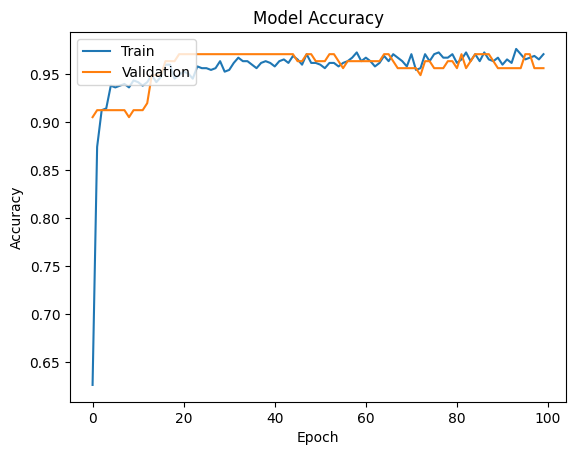

In [123]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

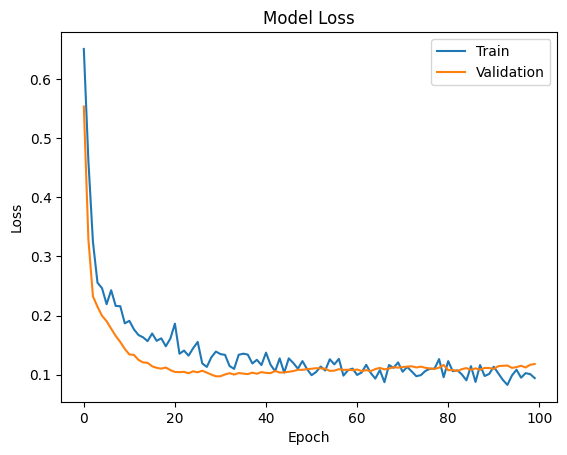

In [124]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')

In [125]:
test_loss, test_acc = model.evaluate(test_feature, test_label)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

6/6 [==============================] - 0s 2ms/step - loss: 0.0985 - accuracy: 0.9360
Test loss: 0.09853526949882507
Test accuracy: 0.9360465407371521


In [126]:
# from sklearn.metrics import precision_recall_fscore_support
# y_true = test_label
# y_pred = model.predict(test_feature)

# # Make the confusion matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix
# cf_matrix = confusion_matrix(y_true.round(), y_pred.round())
# print("\nConfusion Matrix")
# sns.heatmap(cf_matrix, annot=True, cmap='Blues')
# plt.xlabel('Predicted', fontsize=12)
# plt.ylabel('True', fontsize=12)

In [127]:
# print(classification_report(y_true.round(),y_pred.round()))

In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Lakukan prediksi pada data pengujian
y_pred = model.predict(test_feature)

# Hitung metrik evaluasi
mae = mean_absolute_error(test_label, y_pred)
mse = mean_squared_error(test_label, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_label, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

6/6 [==============================] - 0s 3ms/step
Mean Absolute Error (MAE): 0.05741664973850696
Mean Squared Error (MSE): 0.034867969088483504
Root Mean Squared Error (RMSE): 0.18672966847419695
R-squared (R2): 0.21376981896821956


In [129]:
print(model.trainable_variables) 
!mkdir -p saved_model
model.save('saved_model/cervical')

[<tf.Variable 'dense_24/kernel:0' shape=(46, 30) dtype=float32, numpy=
array([[-0.00723037, -0.02761333, -0.0607473 , ..., -0.02153939,
         0.08302899,  0.04159855],
       [ 0.16344826, -0.41498092,  0.11601728, ...,  0.00718715,
        -0.20506358, -0.28364184],
       [-0.29985002,  0.18895581,  0.22292756, ...,  0.13756353,
         0.12964988,  0.00832596],
       ...,
       [ 0.2469532 ,  0.0401037 ,  0.00893833, ..., -0.07645655,
        -0.14978382,  0.09658377],
       [ 0.08757798,  0.16105883, -0.08609901, ...,  0.47431934,
        -0.19799687,  0.1212694 ],
       [ 0.23276246, -0.23383202,  0.46159598, ..., -0.31721267,
         0.01320158, -0.18164617]], dtype=float32)>, <tf.Variable 'dense_24/bias:0' shape=(30,) dtype=float32, numpy=
array([-0.02996628,  0.0234895 , -0.04435353, -0.02957095, -0.01558733,
       -0.0082361 ,  0.00754645, -0.04220666, -0.01160532,  0.01189065,
       -0.04068565, -0.02758894, -0.00683997,  0.00347279, -0.01895539,
       -0.02913367